In [1]:
!pip install music21

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import music21
import glob
from music21 import converter, instrument, note, chord, midi

In [3]:
file_path = "/content/drive/My Drive/LV/*.mid"

notes = []
chords = []
duration = []
notes_to_parse = None

for f in glob.glob(file_path):
  print("Reading file...")
  #read file
  mf = midi.MidiFile()
  mf.open(f)
  mf.read()
  mf.close()

  #lists song parts
  midix = midi.translate.midiFileToStream(mf)
  partStream = midix.parts.stream()
  print("List of instruments on file:", f)

  #info about the song
  parts = midix.parts.stream()
  print("Elements of the MIDI: ",midix.elements)
  print("Parts of the MIDI: ",parts)
  print("LEN parts:", len(parts))

  #extract melody part
  if parts:
    notes_to_parse = parts.parts[0].recurse()
  else:
    notes_to_parse = midi.flat.notes
  print(notes_to_parse)
  #parse notes, duration an chords
  for element in notes_to_parse:
    if isinstance(element, note.Note):
        notes.append(str(element.pitch))
        duration.append(str(element.duration.quarterLength))
    elif isinstance(element, chord.Chord):
        chords.append('.'.join(str(n) for n in element.normalOrder))

  print("DURATION:", duration)
  print("CHORD: ",chords)
  print("Total ",len(notes)," NOTES.")
  

Reading file...
List of instruments on file: /content/drive/My Drive/LV/Hello.mid
Elements of the MIDI:  (<music21.stream.Part 0x7fae4f7d2668>, <music21.stream.Part 0x7fae4fc76e48>, <music21.stream.Part 0x7fae4f3d4e80>, <music21.stream.Part 0x7fae4f2a2f98>, <music21.stream.Part 0x7fae4f1d3940>, <music21.stream.Part 0x7fae4f106f28>, <music21.stream.Part 0x7fae4f022080>, <music21.stream.Part 0x7fae4eebf048>, <music21.stream.Part 0x7fae4edc8ef0>, <music21.stream.Part 0x7fae4ed31a20>, <music21.stream.Part 0x7fae4ec899e8>)
Parts of the MIDI:  <music21.stream.Score 0x7fae4ec60630>
LEN parts: 11
<music21.stream.iterator.RecursiveIterator for Part:0x7fae4f7d2668 @:0>
DURATION: ['0.25', '0.25', '0.75', '0.5', '1.5', '0.5', '0.5', '0.5', '0.25', '0.75', '0.25', '0.75', '0.25', '0.75', '0.5', '0.75', '0.25', '0.5', '0.25', '1.25', '0.25', '0.5', '0.75', '0.25', '0.5', '0.25', '0.25', '0.25', '0.75', '0.5', '0.5', '0.5', '0.25', '0.75', '0.25', '0.75', '0.25', '0.75', '0.25', '0.25', '0.25', '0.25

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#create dict
allnotes = sorted(set(item for item in notes))
print("All notes:")
print(allnotes)

notedict = dict((note_ele, idx) for idx, note_ele in enumerate(allnotes))

print("Dictionary:")
print(notedict)

sequence_length = 7
ninput = []
noutput = []

for i in range(len(notes) - sequence_length):
  sequence_in = notes[i:i + sequence_length]
  sequence_out = notes[i + sequence_length]
  ninput.append([notedict[char] for char in sequence_in])
  noutput.append(notedict[sequence_out])

patterns = len(ninput)
print("")
print("Number of sequences: ", patterns)


All notes:
['A1', 'A2', 'A3', 'A4', 'A5', 'B-1', 'B-2', 'B-3', 'B-4', 'B-5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C#2', 'C#3', 'C#4', 'C#5', 'C#6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'E-1', 'E-2', 'E-3', 'E-4', 'E-5', 'E-6', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'F#1', 'F#2', 'F#3', 'F#4', 'F#5', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'G#1', 'G#2', 'G#3', 'G#4', 'G#5', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6']
Dictionary:
{'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'B-1': 5, 'B-2': 6, 'B-3': 7, 'B-4': 8, 'B-5': 9, 'B1': 10, 'B2': 11, 'B3': 12, 'B4': 13, 'B5': 14, 'C#2': 15, 'C#3': 16, 'C#4': 17, 'C#5': 18, 'C#6': 19, 'C1': 20, 'C2': 21, 'C3': 22, 'C4': 23, 'C5': 24, 'C6': 25, 'D1': 26, 'D2': 27, 'D3': 28, 'D4': 29, 'D5': 30, 'D6': 31, 'E-1': 32, 'E-2': 33, 'E-3': 34, 'E-4': 35, 'E-5': 36, 'E-6': 37, 'E1': 38, 'E2': 39, 'E3': 40, 'E4': 41, 'E5': 42, 'E6': 43, 'F#1': 44, 'F#2': 45, 'F#3': 46, 'F#4': 47, 'F#5': 48, 'F1': 49, 'F2': 50, 'F3': 51, 'F4': 52, 'F5': 53, 'F

In [6]:
from keras.utils import np_utils

#convert it to numpy
ninput = np.reshape(ninput, (patterns, sequence_length, 1))

#normalize input
ninput = ninput / float(len(notedict))

print('example output before categorical')
print(noutput[15])
noutput = np_utils.to_categorical(noutput)
print('example output after categorical')
print(noutput[15])

example output before categorical
23
example output after categorical
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
from keras.optimizers import Adam, RMSprop
print("Shape of input matrix:")
print(ninput.shape[1], ninput.shape[2])
print("Shape of output:")
print(len(notedict))

model = tf.keras.models.Sequential([tf.keras.layers.LSTM(256, input_shape=(ninput.shape[1], ninput.shape[2]), return_sequences=True),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.LSTM(256, return_sequences=True),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.LSTM(128, return_sequences=True),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.LSTM(128, return_sequences=True),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.LSTM(256, return_sequences=False),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(len(notedict)),
                                    tf.keras.layers.Activation('softmax')])
model.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary() 

Shape of input matrix:
7 1
Shape of output:
66
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 256)            264192    
_________________________________________________________________
dropout (Dropout)            (None, 7, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 256)            525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 256)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 7, 128)            197120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 128)            0         
_________________________________________________________________
lstm_3 (L

Epoch 1/2000
20/20 [==============================] - 2s 87ms/step - loss: 3.8919 - accuracy: 0.0424 - val_loss: 3.8274 - val_accuracy: 0.0091
Epoch 2/2000
20/20 [==============================] - 0s 17ms/step - loss: 3.8009 - accuracy: 0.0413 - val_loss: 3.6678 - val_accuracy: 0.0593
Epoch 3/2000
20/20 [==============================] - 0s 18ms/step - loss: 3.7939 - accuracy: 0.0444 - val_loss: 3.7596 - val_accuracy: 0.0091
Epoch 4/2000
20/20 [==============================] - 0s 17ms/step - loss: 3.7867 - accuracy: 0.0481 - val_loss: 3.7138 - val_accuracy: 0.0073
Epoch 5/2000
20/20 [==============================] - 0s 17ms/step - loss: 3.7797 - accuracy: 0.0460 - val_loss: 3.7386 - val_accuracy: 0.0419
Epoch 6/2000
20/20 [==============================] - 0s 19ms/step - loss: 3.7641 - accuracy: 0.0460 - val_loss: 3.6835 - val_accuracy: 0.0583
Epoch 7/2000
20/20 [==============================] - 0s 17ms/step - loss: 3.7532 - accuracy: 0.0475 - val_loss: 3.6783 - val_accuracy: 0.0310

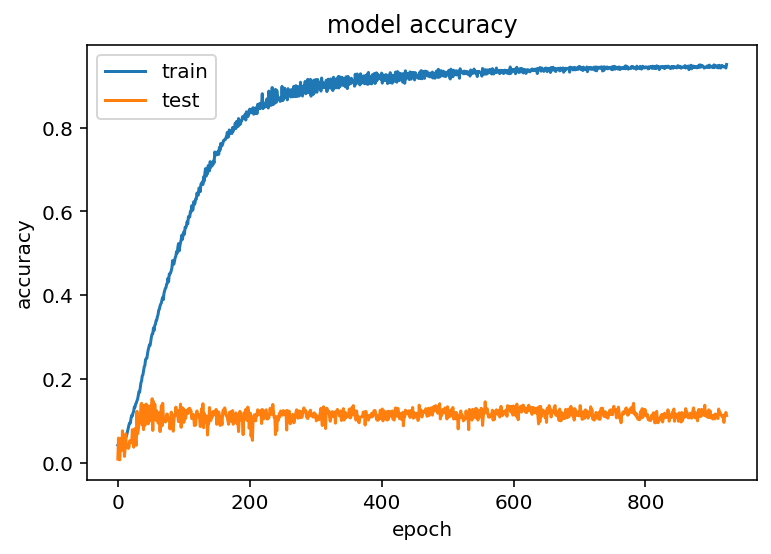

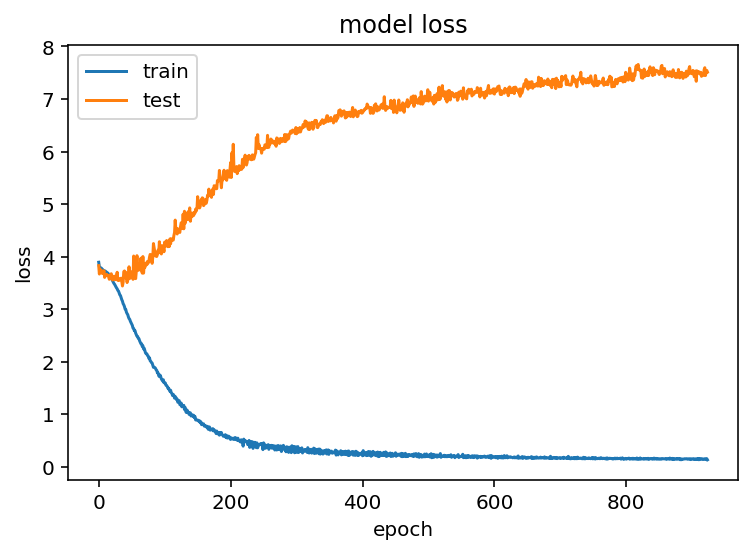

In [8]:

savepath = "/content/drive/My Drive/LV"    
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    savepath, monitor='loss', 
    verbose=0,        
    save_best_only=True,        
    mode='min'
)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached accuracy so cancelling training!")
      self.model.stop_training = True

call_back = myCallback()
history = model.fit(ninput, noutput, epochs=2000, batch_size=512, validation_split=0.1, callbacks=[call_back])
scores = model.evaluate(ninput, noutput)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
from keras.models import load_model

model.save('automusicNotes_model.h5')

**NOTE DURATION**

In [9]:
allduration = sorted(set(item for item in duration))
print("All different durations in the song:")
print(allduration)

#make a dict
durationdict = dict((duration, idx) for idx, duration in enumerate(allduration))
print("Dictionary:")
print(durationdict)


# prepare for sequences training
sequence_length = 7
ninput = []
noutput = []

for i in range(len(duration) - sequence_length):
  seq_in = duration[i:i + sequence_length]
  seq_out = duration[i + sequence_length]
  ninput.append([durationdict[char] for char in seq_in])
  noutput.append(durationdict[seq_out])
patterns = len(ninput)
print("")
print("Number of sequences: ",patterns)
print("")
print("Example of sequence created:")
print(ninput[15],"->--next diuration: --> ",noutput[15])
print(ninput[16],"->--next diuration: --> ",noutput[16])
print(ninput[17],"->--next diuration: --> ",noutput[17])

All different durations in the song:
['0.0', '0.25', '0.5', '0.75', '1.0', '1.25', '1.5', '1.75', '1/3', '10.0', '10/3', '11/3', '13/3', '17/3', '2.0', '2.25', '2.5', '2.75', '2/3', '22/3', '23/3', '28/3', '3.0', '3.25', '3.5', '3.75', '4.0', '4.25', '4.5', '4.75', '4/3', '5.0', '5.5', '5.75', '5/3', '6.0', '6.25', '6.5', '6.75', '7.0', '7.5', '7.75', '7/3', '8.0', '8.25', '8.5', '8/3', '9.5']
Dictionary:
{'0.0': 0, '0.25': 1, '0.5': 2, '0.75': 3, '1.0': 4, '1.25': 5, '1.5': 6, '1.75': 7, '1/3': 8, '10.0': 9, '10/3': 10, '11/3': 11, '13/3': 12, '17/3': 13, '2.0': 14, '2.25': 15, '2.5': 16, '2.75': 17, '2/3': 18, '22/3': 19, '23/3': 20, '28/3': 21, '3.0': 22, '3.25': 23, '3.5': 24, '3.75': 25, '4.0': 26, '4.25': 27, '4.5': 28, '4.75': 29, '4/3': 30, '5.0': 31, '5.5': 32, '5.75': 33, '5/3': 34, '6.0': 35, '6.25': 36, '6.5': 37, '6.75': 38, '7.0': 39, '7.5': 40, '7.75': 41, '7/3': 42, '8.0': 43, '8.25': 44, '8.5': 45, '8/3': 46, '9.5': 47}

Number of sequences:  10965

Example of sequence

<class 'str'>


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


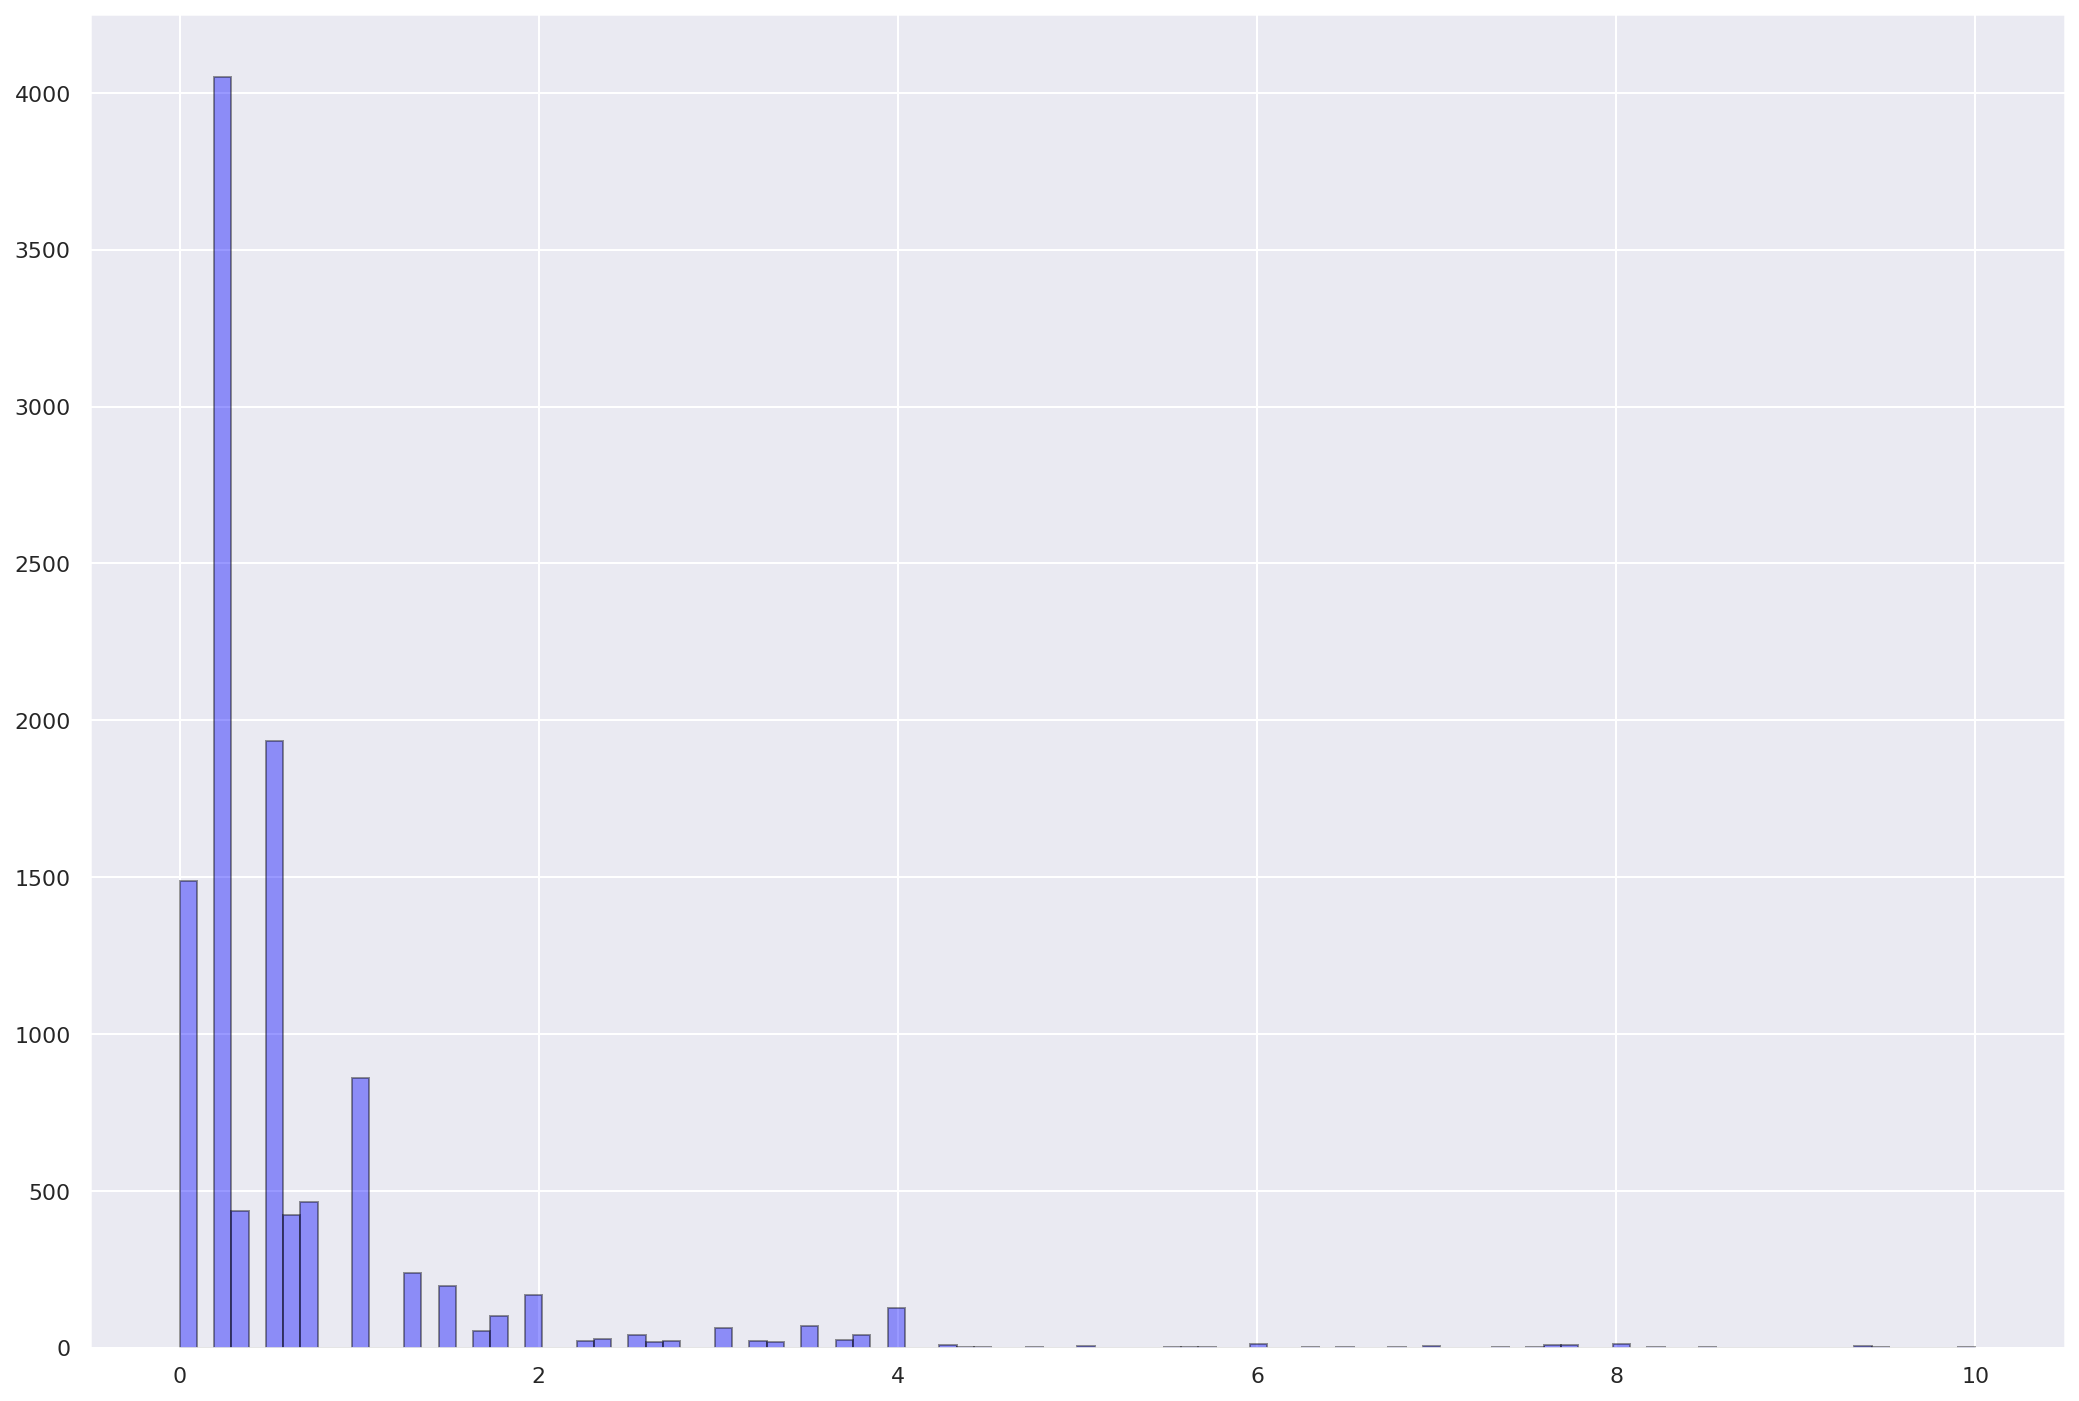

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from fractions import Fraction
print(type(duration[0]))
for (idx, e) in enumerate(duration):
  duration[idx] = float(sum(Fraction(s) for s in e.split()))

sns.set(rc={'figure.figsize':(17.7,12.27)})
sns.distplot(duration, hist=True, kde=False, 
             bins=104, color = 'blue',hist_kws={'edgecolor':'black'})

In [11]:
ninput = np.reshape(ninput, (patterns, sequence_length, 1))

ninput = ninput / float(len(durationdict))

print('example output before categorical')
print(noutput[15])
noutput = np_utils.to_categorical(noutput)
print('example output after categorical')

print(noutput[15])

example output before categorical
3
example output after categorical
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
print("Shape of input matrix:")
print(ninput.shape)
print("Shape of output:")
print(len(durationdict))
model_duration = tf.keras.models.Sequential([tf.keras.layers.LSTM(256, input_shape=(ninput.shape[1], ninput.shape[2]),return_sequences=True),
                                             tf.keras.layers.Dropout(0.3),
                                             tf.keras.layers.LSTM(256, return_sequences=True),
                                             tf.keras.layers.Dropout(0.3),
                                             tf.keras.layers.LSTM(128, return_sequences=True),
                                             tf.keras.layers.Dropout(0.3),
                                             tf.keras.layers.LSTM(128, return_sequences=True),
                                             tf.keras.layers.Dropout(0.2),
                                             tf.keras.layers.LSTM(256, return_sequences=False),
                                             tf.keras.layers.Dropout(0.2),
                                             tf.keras.layers.Dense(len(durationdict)),
                                             tf.keras.layers.Activation('softmax')])
model_duration.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0), loss='categorical_crossentropy', metrics=['accuracy'])
model_duration.summary()

Shape of input matrix:
(10965, 7, 1)
Shape of output:
48
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 7, 256)            264192    
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 256)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 7, 256)            525312    
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 256)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 7, 128)            197120    
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 128)            0         
_______________________________________________________________

(10965, 7, 1)
(10965, 48)
Epoch 1/2000
20/20 [==============================] - 2s 89ms/step - loss: 2.6477 - accuracy: 0.3861 - val_loss: 2.9514 - val_accuracy: 0.0283
Epoch 2/2000
20/20 [==============================] - 0s 19ms/step - loss: 2.1191 - accuracy: 0.4056 - val_loss: 2.7778 - val_accuracy: 0.0283
Epoch 3/2000
20/20 [==============================] - 0s 19ms/step - loss: 2.1027 - accuracy: 0.4042 - val_loss: 2.4911 - val_accuracy: 0.0283
Epoch 4/2000
20/20 [==============================] - 0s 19ms/step - loss: 2.0780 - accuracy: 0.4067 - val_loss: 2.5571 - val_accuracy: 0.0283
Epoch 5/2000
20/20 [==============================] - 0s 19ms/step - loss: 2.0418 - accuracy: 0.4046 - val_loss: 2.5908 - val_accuracy: 0.0283
Epoch 6/2000
20/20 [==============================] - 0s 19ms/step - loss: 2.0244 - accuracy: 0.4089 - val_loss: 2.7934 - val_accuracy: 0.0283
Epoch 7/2000
20/20 [==============================] - 0s 19ms/step - loss: 2.0134 - accuracy: 0.4117 - val_loss: 2.4

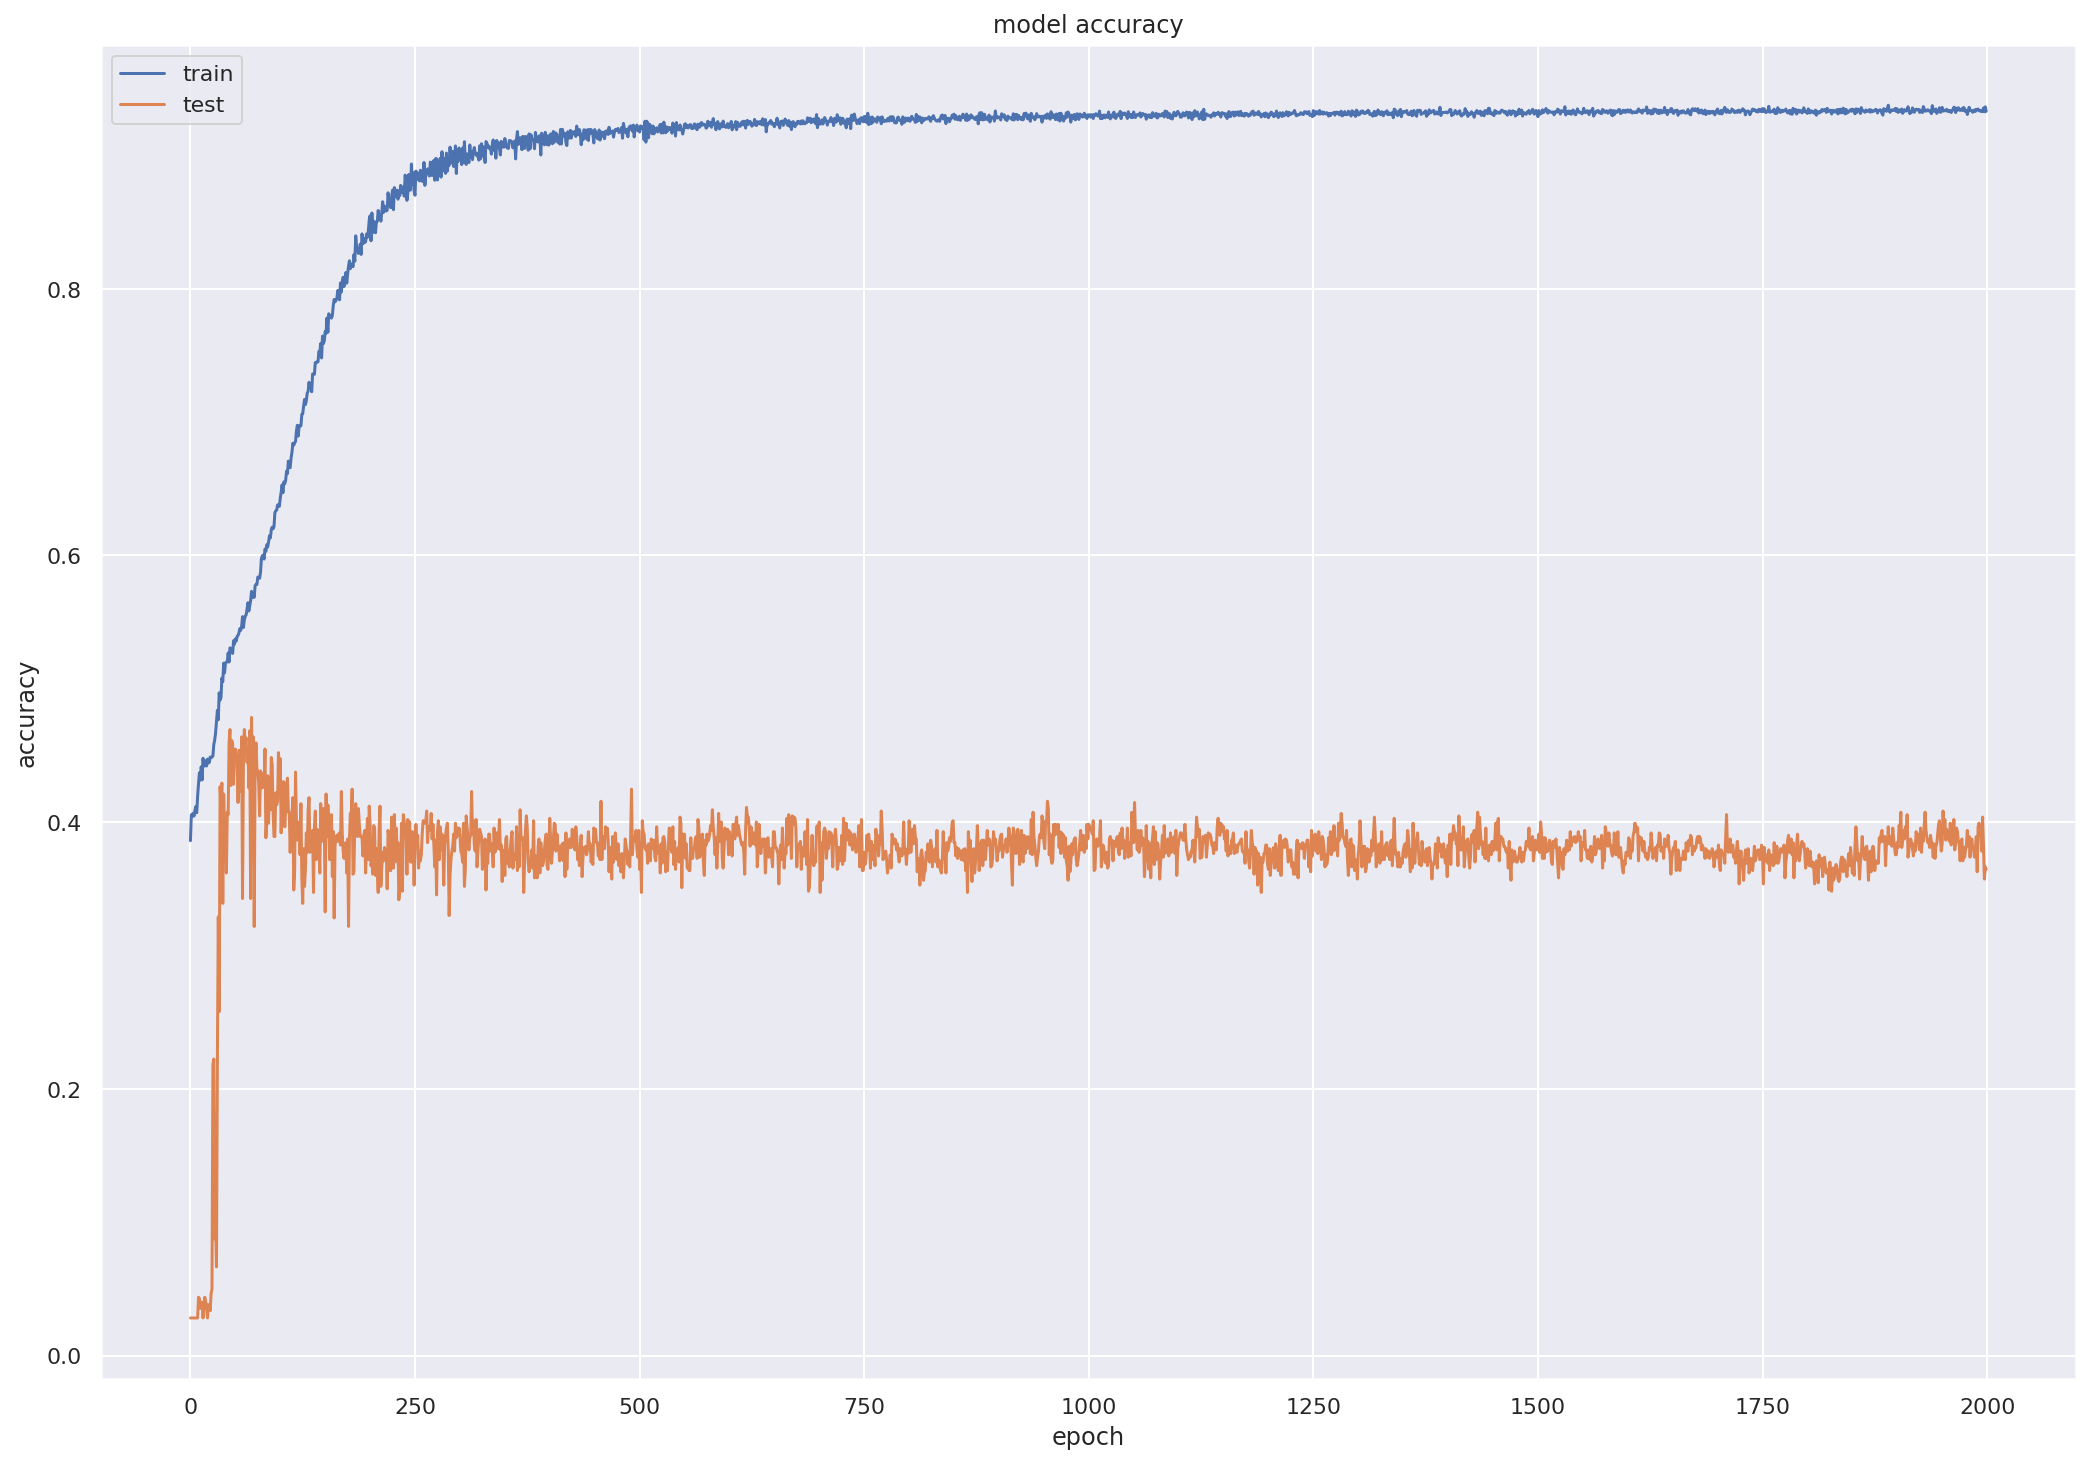

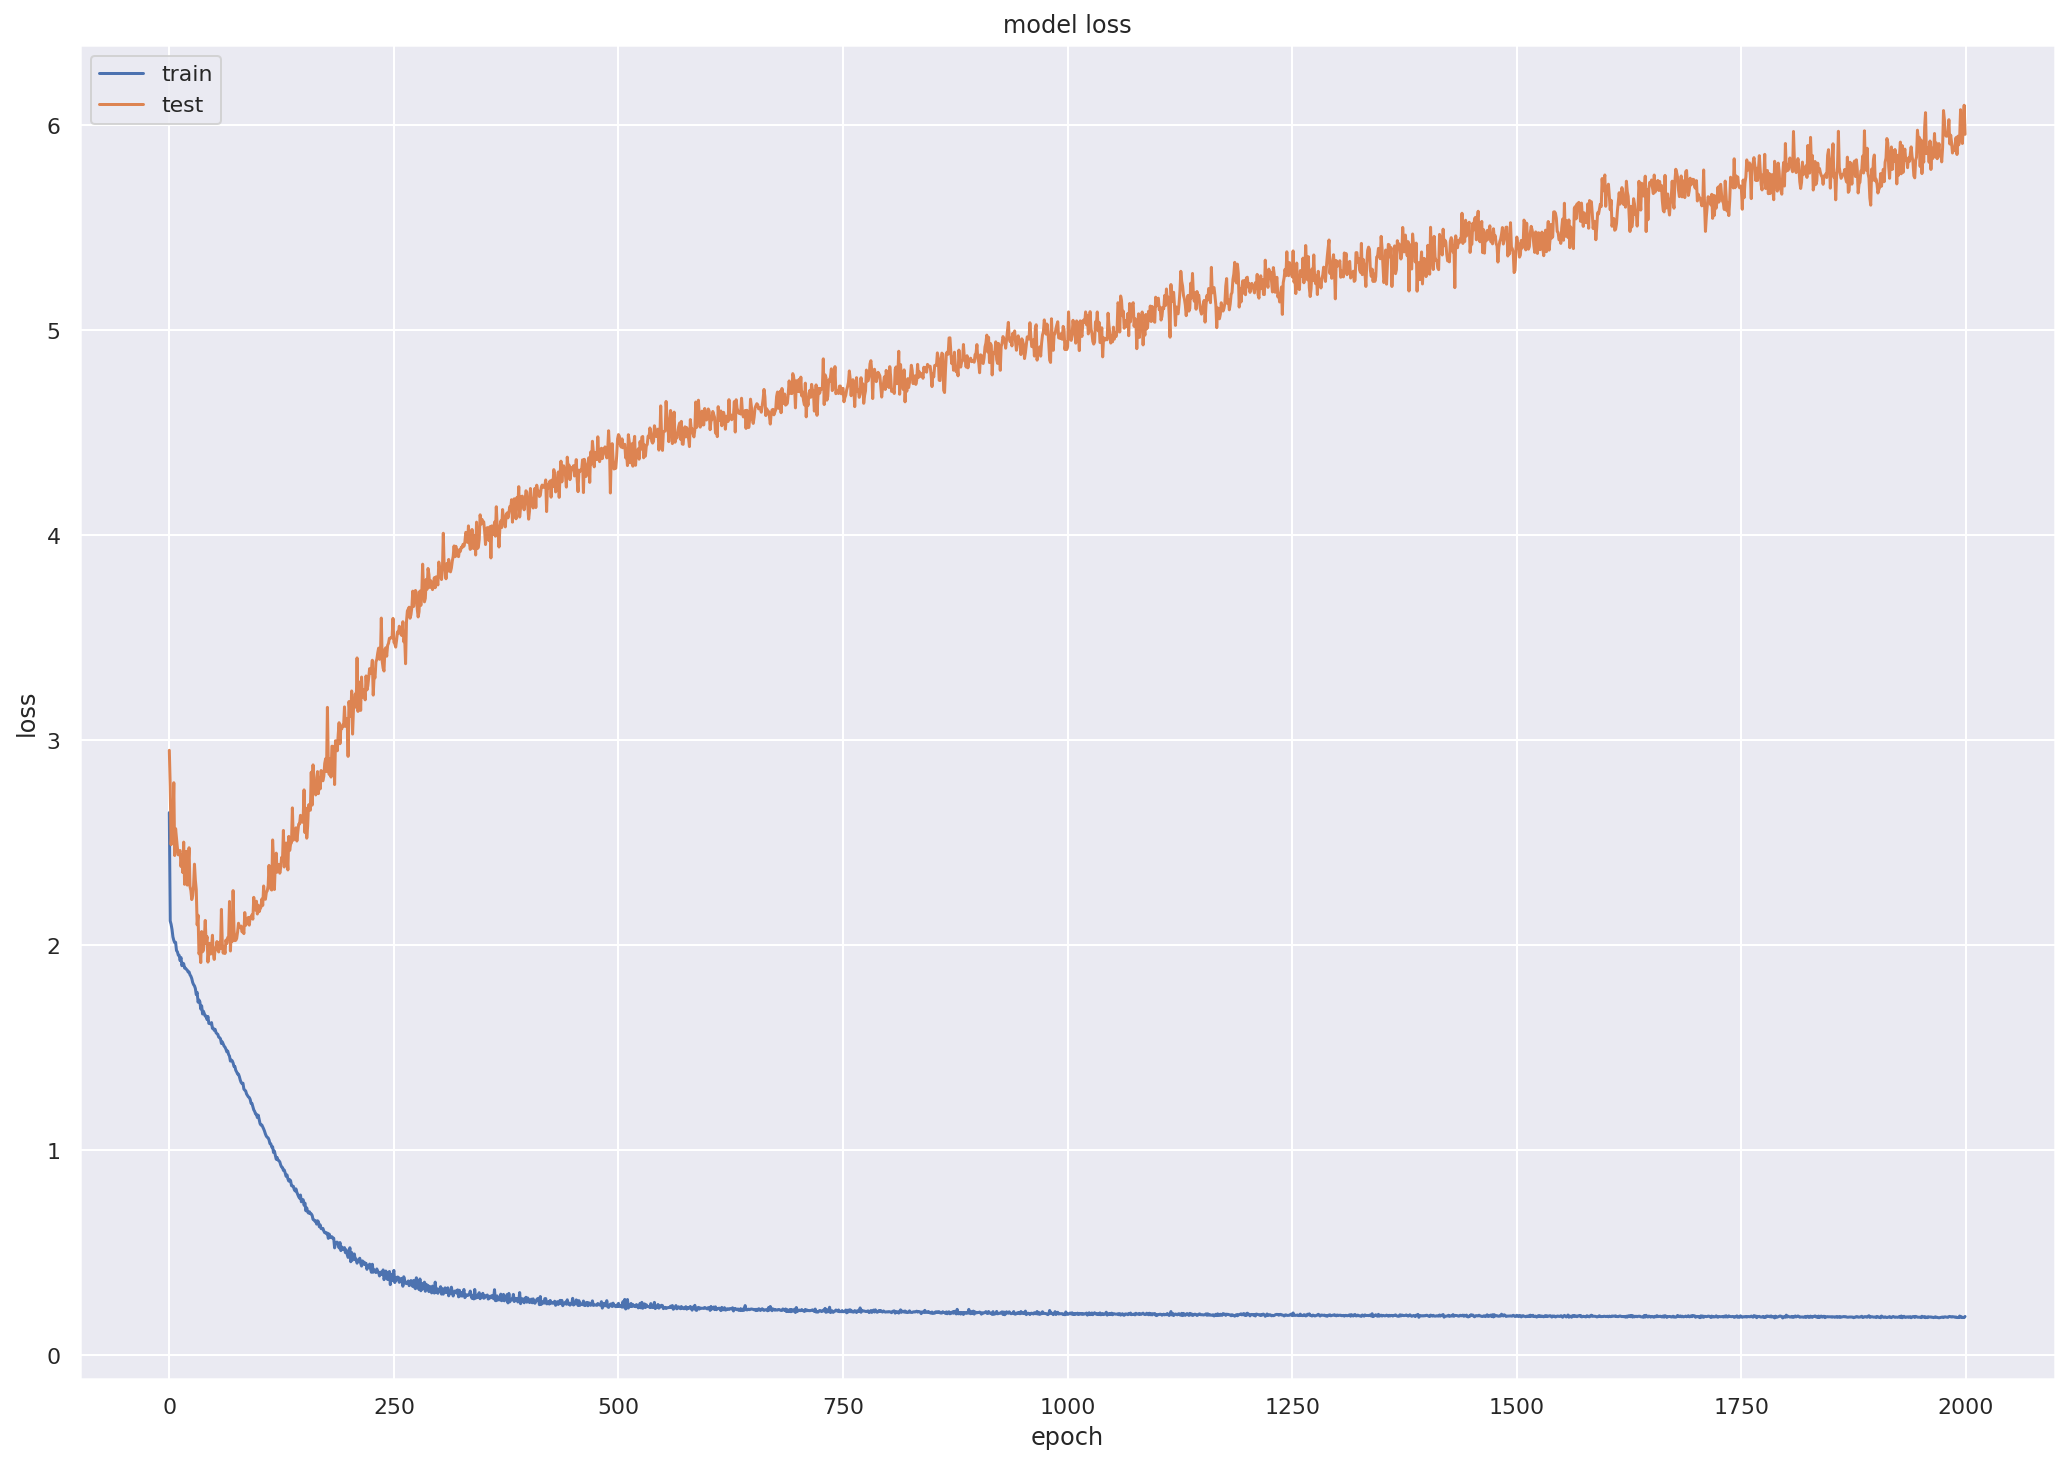

In [13]:
print(ninput.shape)
print(noutput.shape)
history_duration = model_duration.fit(ninput, noutput, epochs=2000, batch_size=512, validation_split=0.1, callbacks=[call_back])
scores_duration = model_duration.evaluate(ninput, noutput)
# list all data in history
print(history_duration.history.keys())

# summarize history for accuracy
plt.plot(history_duration.history['accuracy'])
plt.plot(history_duration.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_duration.history['loss'])
plt.plot(history_duration.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_duration.save('automusicDuration_model.h5')  # creates a HDF5 file 'my_model.h5'

In [22]:
# create song with number of notes specify
gnotes = 200
songoutput = []
duration_out = []

#seeds of initial
seed_note = np.array([12, 2, 38, 13, 5, 8, 28])
seed_duration = np.array([4, 4, 4, 25, 4, 4, 23])

#create reverse dict
re_notedict = dict((idx, note) for idx, note in enumerate(allnotes))
re_durationdict = dict((idx, duration) for idx, duration in enumerate(allduration))

for i in range(7):
  songoutput.append(re_notedict[seed_note[i]])
  duration_out.append(re_durationdict[seed_duration[i]])

loops = 0
for note_idx in range(gnotes):
  predict_input = np.reshape(seed_note, (1, len(seed_note), 1))
  predict_input = predict_input / float(len(re_notedict))
  prediction = model.predict(predict_input, verbose=0)
  #get max prov result in output to reverse find the note
  ix = np.argmax(prediction)
  result = re_notedict[ix]

  #let's avoid tonic notes on scale to get too present
  if (len(songoutput) > 3):
    if (result == songoutput[-2]):
      loops = loops + 1
      if (loops == 6):
        rdnote = np.random.randint(0, len(re_notedict))
        result = re_notedict[rdnote]
        loops = 0
  # write the notes 
  print("Predicted:", ix, "--", result)
  songoutput.append(result)

  print("Seed before:", seed_note)
  seed_note = np.append(seed_note, ix)
  print("Append: ", seed_note)
  seed_note = seed_note[1: len(seed_note)]
  print("Seed Window: ", seed_note)

  

Predicted: 2 -- A3
Seed before: [12  2 38 13  5  8 28]
Append:  [12  2 38 13  5  8 28  2]
Seed Window:  [ 2 38 13  5  8 28  2]
Predicted: 3 -- A4
Seed before: [ 2 38 13  5  8 28  2]
Append:  [ 2 38 13  5  8 28  2  3]
Seed Window:  [38 13  5  8 28  2  3]
Predicted: 34 -- E-3
Seed before: [38 13  5  8 28  2  3]
Append:  [38 13  5  8 28  2  3 34]
Seed Window:  [13  5  8 28  2  3 34]
Predicted: 2 -- A3
Seed before: [13  5  8 28  2  3 34]
Append:  [13  5  8 28  2  3 34  2]
Seed Window:  [ 5  8 28  2  3 34  2]
Predicted: 13 -- B4
Seed before: [ 5  8 28  2  3 34  2]
Append:  [ 5  8 28  2  3 34  2 13]
Seed Window:  [ 8 28  2  3 34  2 13]
Predicted: 18 -- C#5
Seed before: [ 8 28  2  3 34  2 13]
Append:  [ 8 28  2  3 34  2 13 18]
Seed Window:  [28  2  3 34  2 13 18]
Predicted: 42 -- E5
Seed before: [28  2  3 34  2 13 18]
Append:  [28  2  3 34  2 13 18 42]
Seed Window:  [ 2  3 34  2 13 18 42]
Predicted: 0 -- A1
Seed before: [ 2  3 34  2 13 18 42]
Append:  [ 2  3 34  2 13 18 42  0]
Seed Window:  [

In [23]:
#get the duration
for _ in range(gnotes):
  prediction_input = np.reshape(seed_duration, (1, len(seed_duration), 1))
  prediction_input = prediction_input / float(len(re_durationdict))
  prediction = model.predict(prediction_input, verbose=0)

# get the max prob result
  ix = np.argmax(prediction)
  if (ix == 0) or (ix == 1):
    ix = np.random.randint(1, len(re_durationdict))
  if ix > 4:
    ix = ix / 4
  result = re_durationdict[int(ix)]

  if len(duration_out)> 3.:
    if (result == duration_out[-2]):
      loops = loops + 1
      if (loops == 3):
        rdduration = np.random.randint(0, len(re_durationdict))
        result = re_durationdict[rdduration]
        loops = 0
        ix = rdduration

  # add duration to output
  duration_out.append(result)
  seed_duration = np.append(seed_duration, ix)
  seed_duration = seed_duration[1: len(seed_duration)]

print("Duration generated: ", duration_out)

        

Duration generated:  ['1.0', '1.0', '1.0', '3.75', '1.0', '1.0', '3.25', '1.75', '0.75', '1.0', '0.25', '2.25', '0.75', '0.5', '0.75', '1.0', '10.0', '1.5', '2.5', '1.5', '1.5', '0.75', '2.25', '0.5', '2.0', '2.5', '1.0', '1.0', '2.25', '1.0', '0.75', '0.75', '2.5', '0.5', '2.0', '0.5', '1.75', '10/3', '1.75', '0.75', '0.75', '2.0', '0.5', '1.75', '0.75', '0.75', '1.0', '2.25', '1.5', '1.5', '0.75', '1.0', '11/3', '1/3', '2.5', '1.5', '0.75', '1.0', '2.25', '0.75', '2.0', '0.5', '1.75', '1.0', '10.0', '2.5', '1.5', '0.75', '0.75', '2.25', '0.5', '2.0', '0.5', '1.75', '1.0', '1.75', '2.5', '0.5', '0.75', '0.75', '2.0', '0.5', '1.75', '0.75', '1.0', '1.0', '2.25', '1.5', '1.5', '0.75', '1.0', '0.5', '2.25', '1.5', '0.75', '0.75', '1.0', '0.25', '11/3', '1.5', '1.5', '1.5', '2.0', '0.5', '1.0', '1.0', '2.25', '0.5', '1.75', '0.75', '1.0', '10.0', '10/3', '0.75', '1.5', '1.5', '2.0', '0.5', '1.75', '0.75', '1.0', '2.25', '0.5', '0.75', '0.75', '1.75', '2.0', '0.5', '0.75', '1.75', '1.0', '

**BUILD THE SONG**

In [24]:
finalsong = []
for ele in range(gnotes):
  print("Note: ",songoutput[ele])
  loopnote = note.Note(songoutput[ele])
  loopnote.storedInstrument = instrument.Piano()

  print("Duration: ", duration_out[ele])
  if "/" in duration_out[ele]:
    x = str(duration_out[ele]).split('/')
    duration_out[ele] = int(x[0]) / int(x[1])

  loopnote.quarterLength = float(duration_out[ele])
  finalsong.append(loopnote)

Note:  B3
Duration:  1.0
Note:  A3
Duration:  1.0
Note:  E1
Duration:  1.0
Note:  B4
Duration:  3.75
Note:  B-1
Duration:  1.0
Note:  B-4
Duration:  1.0
Note:  D3
Duration:  3.25
Note:  A3
Duration:  1.75
Note:  A4
Duration:  0.75
Note:  E-3
Duration:  1.0
Note:  A3
Duration:  0.25
Note:  B4
Duration:  2.25
Note:  C#5
Duration:  0.75
Note:  E5
Duration:  0.5
Note:  A1
Duration:  0.75
Note:  A1
Duration:  1.0
Note:  E-3
Duration:  10.0
Note:  A3
Duration:  1.5
Note:  A4
Duration:  2.5
Note:  C#4
Duration:  1.5
Note:  C#5
Duration:  1.5
Note:  B1
Duration:  0.75
Note:  C#5
Duration:  2.25
Note:  D3
Duration:  0.5
Note:  E5
Duration:  2.0
Note:  B-3
Duration:  2.5
Note:  G#5
Duration:  1.0
Note:  F#5
Duration:  1.0
Note:  E5
Duration:  2.25
Note:  D5
Duration:  1.0
Note:  C#5
Duration:  0.75
Note:  D5
Duration:  0.75
Note:  C#5
Duration:  2.5
Note:  B4
Duration:  0.5
Note:  B4
Duration:  2.0
Note:  C#5
Duration:  0.5
Note:  B4
Duration:  1.75
Note:  A4
Duration:  10/3
Note:  B4
Duration: 

**TO MIDI FILE**

In [25]:
from music21 import stream
part = stream.Part()
part.append(finalsong)
part.insert(0, instrument.Piano())
Song = stream.Score()
Song.insert(0, part)
Song.write('midi', fp='Generated_song.mid')  

'Generated_song.mid'